# Determining Important Features for Predicting Chain Restaurants’ Star Ratings

### Kellsie Shan
### ECO312 Final Project
### Professor Hanke
### December 9, 2022


In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


## Loading and scrubbing Yelp data

In [3]:
# read 'business' data into dataframe
business = pd.read_json('/content/drive/MyDrive/Colab Notebooks/Yelp Datasets/yelp_academic_dataset_business.json', lines=True)
print(business.shape)
business.head()

(150346, 14)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [4]:
# filter for only restaurant businesses
business['Restaurants'] = business['categories'].str.contains('Restaurants')

# create new dataframe containing only restaurants
rest = business.loc[business.Restaurants == True]
rest = rest.drop(['Restaurants'], axis=1)
print(rest.shape)
rest.head()

(52268, 14)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",None
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."
11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,1,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'..."


In [5]:
# filter for only fast food and fast casual chain restaurants
rest['Fastfood'] = rest['categories'].str.contains('Fast Food')

# create new dataframe containing only fast food and fast casual chain restaurants
fast = rest.loc[rest.Fastfood == True]

# remove restaurants that don't appear more than 10 times in dataframe
# to ensure all restaurants are a part of a well-known chain
v = pd.DataFrame(fast['name'])
fast = fast[v.replace(v.apply(pd.Series.value_counts)).gt(10).all(1)]
print(fast.shape)
fast.head()

(5135, 15)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,Fastfood
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '...",True
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '...",True
122,VZzivJEbmHItOxNXJB3SpA,Subway,"330 Franklin Rd, Ste 900-d",Brentwood,TN,37027,36.026363,-86.789473,2.5,14,1,"{'BusinessParking': '{'garage': False, 'street...","Sandwiches, Fast Food, Restaurants","{'Monday': '9:0-22:0', 'Tuesday': '9:0-22:0', ...",True
153,aNtKyc2rr-uK5cqzY9TVQQ,Chipotle Mexican Grill,10160 Ulmerton Rd,Largo,FL,33771,27.894167,-82.779866,3.0,19,1,"{'RestaurantsPriceRange2': '1', 'Caters': 'Tru...","Mexican, Fast Food, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '10:45-22:0',...",True
161,G4lRmwDHdvhZAhmtlsYYBw,Wendy's,741 Thompson Ln,Nashville,TN,37204,36.112076,-86.767446,1.5,37,1,"{'RestaurantsPriceRange2': '1', 'BikeParking':...","Burgers, Restaurants, Fast Food","{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ...",True


In [6]:
# find restaurants that have most attributes to see all potential Yelp attributes
df = pd.DataFrame(fast.iloc[:, 11])
df['length'] = df['attributes'].str.len()
print(df[df.length == df.length.max()])
print('Restaurant 1 attributes:', fast._get_value(24903, 'attributes'))
print('Restaurant 2 attributes:', fast._get_value(42442, 'attributes'))
print('Restaurant 3 attributes:', fast._get_value(66877, 'attributes'))

                                              attributes  length
24903  {'Caters': 'True', 'BikeParking': 'True', 'Alc...    27.0
42442  {'RestaurantsCounterService': 'True', 'Dietary...    27.0
66877  {'WheelchairAccessible': 'True', 'RestaurantsA...    27.0
Restaurant 1 attributes: {'Caters': 'True', 'BikeParking': 'True', 'Alcohol': "u'none'", 'OutdoorSeating': 'True', 'RestaurantsTableService': 'False', 'NoiseLevel': "u'average'", 'DietaryRestrictions': "{'dairy-free': True, 'gluten-free': True, 'vegan': True, 'kosher': False, 'halal': False, 'soy-free': True, 'vegetarian': True}", 'BusinessAcceptsBitcoin': 'False', 'RestaurantsCounterService': 'True', 'BYOBCorkage': "u'no'", 'DogsAllowed': 'False', 'HasTV': 'True', 'WheelchairAccessible': 'True', 'RestaurantsPriceRange2': '1', 'WiFi': "'free'", 'RestaurantsAttire': "'casual'", 'Open24Hours': 'False', 'BusinessParking': "{u'valet': False, u'garage': False, u'street': None, u'lot': None, u'validated': False}", 'DriveThru': 'True', '

### Attributes selected to be as features for multivariate regression due to how applicable they are for fast food and fast casual chain restaurants:

BusinessAcceptsCreditCards, RestaurantsTakeOut, BikeParking, RestaurantsPriceRange2, HasTV, OutdoorSeating, GoodForKids, Alcohol, Smoking, WiFi, BusinessParking, HappyHour, RestaurantsTableService, Caters, DogsAllowed, WheelchairAccessible, DriveThru, RestaurantsDelivery, RestaurantsGoodForGroups, BusinessAcceptsBitcoin

In [7]:
# function that extract keys from the nested dictionary
def extract_keys(attr, key):
    if attr == None:
        return "{}"
    if key in attr:
        return attr.pop(key)

# convert string to dictionary
import ast
def str_to_dict(attr):
    if attr != None:
        return ast.literal_eval(attr)
    else:
        return ast.literal_eval("{}") 

In [8]:
# get dummies from nested attributes
fast['BusinessParking'] = fast.apply(lambda x: str_to_dict(extract_keys(x['attributes'], 'BusinessParking')), axis=1)
fast['Ambience'] = fast.apply(lambda x: str_to_dict(extract_keys(x['attributes'], 'Ambience')), axis=1)
fast['GoodForMeal'] = fast.apply(lambda x: str_to_dict(extract_keys(x['attributes'], 'GoodForMeal')), axis=1)
fast['DietaryRestrictions'] = fast.apply(lambda x: str_to_dict(extract_keys(x['attributes'], 'Dietary')), axis=1)
fast['Music'] = fast.apply(lambda x: str_to_dict(extract_keys(x['attributes'], 'Music')), axis=1)
fast

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,Fastfood,BusinessParking,Ambience,GoodForMeal,DietaryRestrictions,Music
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '...",True,None,None,{},{},{}
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '...",True,"{'garage': False, 'street': False, 'validated'...",{},{},{},{}
122,VZzivJEbmHItOxNXJB3SpA,Subway,"330 Franklin Rd, Ste 900-d",Brentwood,TN,37027,36.026363,-86.789473,2.5,14,1,"{'OutdoorSeating': 'False', 'RestaurantsTakeOu...","Sandwiches, Fast Food, Restaurants","{'Monday': '9:0-22:0', 'Tuesday': '9:0-22:0', ...",True,"{'garage': False, 'street': False, 'validated'...","{'touristy': False, 'hipster': False, 'romanti...","{'dessert': False, 'latenight': False, 'lunch'...",{},{}
153,aNtKyc2rr-uK5cqzY9TVQQ,Chipotle Mexican Grill,10160 Ulmerton Rd,Largo,FL,33771,27.894167,-82.779866,3.0,19,1,"{'RestaurantsPriceRange2': '1', 'Caters': 'Tru...","Mexican, Fast Food, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '10:45-22:0',...",True,"{'garage': False, 'street': False, 'validated'...","{'touristy': False, 'hipster': False, 'romanti...","{'dessert': False, 'latenight': False, 'lunch'...",{},{}
161,G4lRmwDHdvhZAhmtlsYYBw,Wendy's,741 Thompson Ln,Nashville,TN,37204,36.112076,-86.767446,1.5,37,1,"{'RestaurantsPriceRange2': '1', 'BikeParking':...","Burgers, Restaurants, Fast Food","{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ...",True,"{'garage': False, 'street': False, 'validated'...","{'touristy': False, 'hipster': False, 'romanti...","{'dessert': False, 'latenight': False, 'lunch'...",{},{}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150193,0COlL5IKRu5sdWIsEiQAZg,Chick-fil-A,20 State Farm Dr,Glen Mills,PA,19342,39.883115,-75.542323,3.0,52,1,"{'RestaurantsPriceRange2': '1', 'RestaurantsAt...","Caterers, Fast Food, Event Planning & Services...","{'Monday': '0:0-0:0', 'Tuesday': '10:30-21:0',...",True,"{'garage': False, 'street': False, 'validated'...","{'romantic': False, 'intimate': False, 'classy...","{'dessert': False, 'latenight': False, 'lunch'...",{},{}
150205,Agh0Z_PACmbdEpLyjvuwZg,Chick-fil-A,6240 E Whitestown Pkwy,Whitestown,IN,46075,39.949502,-86.349949,2.5,32,1,"{'DriveThru': 'True', 'RestaurantsTakeOut': 'T...","Chicken Shop, Caterers, Fast Food, Restaurants...","{'Monday': '0:0-0:0', 'Tuesday': '6:30-21:0', ...",True,"{'garage': False, 'street': False, 'validated'...",{},{},{},{}
150231,C96ynw3G1KrqBOdafxbTKw,Subway,4882 Sun City Center Blvd,Sun City Center,FL,33573,27.714605,-82.335851,4.0,5,1,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...","Restaurants, Fast Food, Sandwiches","{'Monday': '0:0-0:0', 'Tuesday': '9:0-21:0', '...",True,{},"{'romantic': False, 'intimate': False, 'classy...",{},{},{}
150248,5ufcSii8MbAI3Yn5BQq2tA,Denny's,1096 Shighway Dr,Fenton,MO,63026,38.541507,-90.467582,2.5,11,0,"{'GoodForKids': 'True', 'OutdoorSeating': 'Fal...","American (Traditional), Diners, Breakfast & Br...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",True,"{'garage': False, 'street': False, 'validated'...","{'touristy': False, 'hipster': False, 'romanti...",{},{},{}


In [9]:
# create table with attribute dummies
df_attr = pd.concat([fast['attributes'].apply(pd.Series), fast['BusinessParking'].apply(pd.Series),
                    fast['Ambience'].apply(pd.Series), fast['GoodForMeal'].apply(pd.Series), 
                    fast['DietaryRestrictions'].apply(pd.Series), fast['Music'].apply(pd.Series)], axis=1)
print(df_attr.shape)
df_attr_dummies = pd.get_dummies(df_attr)
print(df_attr_dummies.shape)
df_attr_dummies

(5135, 58)
(5135, 141)


,BusinessAcceptsCreditCards_False,BusinessAcceptsCreditCards_None,BusinessAcceptsCreditCards_True,RestaurantsAttire_'casual',RestaurantsAttire_'dressy',RestaurantsAttire_'formal',RestaurantsAttire_None,RestaurantsAttire_u'casual',RestaurantsAttire_u'dressy',RestaurantsAttire_u'formal',...,brunch_True,breakfast_False,breakfast_True,dj_False,background_music_False,no_music_False,jukebox_False,live_False,video_False,karaoke_False
5,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
122,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
153,0,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
161,0,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150193,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
150205,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150231,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150248,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# pull out names and stars from fastfood dataframe
stars = fast[['name', 'stars']]
stars

,name,stars
5,Sonic Drive-In,2.0
9,Sonic Drive-In,1.5
122,Subway,2.5
153,Chipotle Mexican Grill,3.0
161,Wendy's,1.5
...,...,...
150193,Chick-fil-A,3.0
150205,Chick-fil-A,2.5
150231,Subway,4.0
150248,Denny's,2.5


In [11]:
# concat all needed dataframes
final = pd.concat([df_attr_dummies, stars], axis=1)
final

,BusinessAcceptsCreditCards_False,BusinessAcceptsCreditCards_None,BusinessAcceptsCreditCards_True,RestaurantsAttire_'casual',RestaurantsAttire_'dressy',RestaurantsAttire_'formal',RestaurantsAttire_None,RestaurantsAttire_u'casual',RestaurantsAttire_u'dressy',RestaurantsAttire_u'formal',...,breakfast_True,dj_False,background_music_False,no_music_False,jukebox_False,live_False,video_False,karaoke_False,name,stars
5,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,Sonic Drive-In,2.0
9,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Sonic Drive-In,1.5
122,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,Subway,2.5
153,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Chipotle Mexican Grill,3.0
161,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Wendy's,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150193,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,Chick-fil-A,3.0
150205,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Chick-fil-A,2.5
150231,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Subway,4.0
150248,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,Denny's,2.5


In [12]:
# list all features in final dataframe
list(final)

['BusinessAcceptsCreditCards_False',
 'BusinessAcceptsCreditCards_None',
 'BusinessAcceptsCreditCards_True',
 "RestaurantsAttire_'casual'",
 "RestaurantsAttire_'dressy'",
 "RestaurantsAttire_'formal'",
 'RestaurantsAttire_None',
 "RestaurantsAttire_u'casual'",
 "RestaurantsAttire_u'dressy'",
 "RestaurantsAttire_u'formal'",
 'OutdoorSeating_False',
 'OutdoorSeating_None',
 'OutdoorSeating_True',
 'RestaurantsReservations_False',
 'RestaurantsReservations_None',
 'RestaurantsReservations_True',
 'Caters_False',
 'Caters_None',
 'Caters_True',
 'RestaurantsTakeOut_False',
 'RestaurantsTakeOut_None',
 'RestaurantsTakeOut_True',
 "Alcohol_'beer_and_wine'",
 "Alcohol_'full_bar'",
 "Alcohol_'none'",
 'Alcohol_None',
 "Alcohol_u'beer_and_wine'",
 "Alcohol_u'full_bar'",
 "Alcohol_u'none'",
 'GoodForKids_False',
 'GoodForKids_None',
 'GoodForKids_True',
 'RestaurantsPriceRange2_1',
 'RestaurantsPriceRange2_2',
 'RestaurantsPriceRange2_3',
 'RestaurantsPriceRange2_4',
 'RestaurantsPriceRange2_Non

In [13]:
# drop unnecessary variables
final = final.drop([
 "RestaurantsAttire_'casual'",
 "RestaurantsAttire_'dressy'",
 "RestaurantsAttire_'formal'",
 'RestaurantsAttire_None',
 "RestaurantsAttire_u'casual'",
 "RestaurantsAttire_u'dressy'",
 "RestaurantsAttire_u'formal'",
 'CoatCheck_False', 
 "Alcohol_u'beer_and_wine'",
 "Alcohol_u'full_bar'",
 "Alcohol_u'none'",
 "WiFi_u'free'",
 "WiFi_u'no'",
 "WiFi_u'paid'",
 "NoiseLevel_'average'",
 "NoiseLevel_'loud'",
 "NoiseLevel_'quiet'",
 "NoiseLevel_'very_loud'",
 'NoiseLevel_None',
 "NoiseLevel_u'average'",
 "NoiseLevel_u'loud'",
 "NoiseLevel_u'quiet'",
 "NoiseLevel_u'very_loud'",
 'BYOB_False',
 'BYOB_True',
 'Corkage_False',
 "BYOBCorkage_'no'",
 "BYOBCorkage_'yes_free'",
 "BYOBCorkage_u'no'",
 'GoodForDancing_False',
 "BestNights_{'monday': False, 'tuesday': False, 'friday': False, 'wednesday': False, 'thursday': False, 'sunday': False, 'saturday': False}",
 "BestNights_{'monday': False, 'tuesday': False, 'friday': False, 'wednesday': False, 'thursday': False, 'sunday': False, 'saturday': True}",
 "BestNights_{'monday': False, 'tuesday': False, 'friday': False, 'wednesday': False, 'thursday': False, 'sunday': True, 'saturday': False}",
 "BestNights_{'monday': False, 'tuesday': False, 'friday': False, 'wednesday': True, 'thursday': False, 'sunday': False, 'saturday': False}",
 "BestNights_{'monday': False, 'tuesday': False, 'friday': True, 'wednesday': False, 'thursday': False, 'sunday': False, 'saturday': False}",
 "BestNights_{'monday': False, 'tuesday': True, 'friday': False, 'wednesday': False, 'thursday': False, 'sunday': False, 'saturday': False}",
 "BestNights_{u'monday': False, u'tuesday': False, u'wednesday': False, u'thursday': False, u'friday': False, u'saturday': False, u'sunday': False}",
 "DietaryRestrictions_{'dairy-free': True, 'gluten-free': True, 'vegan': True, 'kosher': False, 'halal': False, 'soy-free': True, 'vegetarian': True}",
 'validated_False',
 'validated_True',
 'valet_False',
 'touristy_False',
 'touristy_True',
 'hipster_False',
 'hipster_True',
 'romantic_False',
 'divey_False',
 'divey_True',
 'intimate_False',
 'trendy_False',
 'trendy_True',
 'upscale_False',
 'classy_False',
 'classy_True',
 'casual_False',
 'casual_True',
 'dessert_False',
 'dessert_True',
 'latenight_False',
 'latenight_True',
 'lunch_False',
 'lunch_True',
 'dinner_False',
 'dinner_True',
 'brunch_False',
 'brunch_True',
 'breakfast_False',
 'breakfast_True',
 'dj_False',
 'background_music_False',
 'no_music_False',
 'jukebox_False',
 'live_False',
 'video_False',
 'karaoke_False',
 'Open24Hours_False'], axis = 1)


In [14]:
# remove 'false' and 'none' dummies to decrease multicollinearity/independent variable correlations
final = final.drop(['BusinessAcceptsCreditCards_False',
 'BusinessAcceptsCreditCards_None',
 'OutdoorSeating_False',
 'OutdoorSeating_None',
 'RestaurantsReservations_False',
 'RestaurantsReservations_None',
 'Caters_False',
 'Caters_None',
 'RestaurantsTakeOut_False',
 'RestaurantsTakeOut_None',
 "Alcohol_'none'",
 'Alcohol_None',
 'GoodForKids_False',
 'GoodForKids_None',
 'ByAppointmentOnly_False',
 'DogsAllowed_False',
 'RestaurantsTableService_False',
 'RestaurantsTableService_None',
 'RestaurantsGoodForGroups_False',
 'RestaurantsGoodForGroups_None',
 'RestaurantsDelivery_False',
 'RestaurantsDelivery_None',
 "WiFi_'no'",
 'WiFi_None',
 'garage_False',
 'WheelchairAccessible_False',
 'HasTV_False',
 'HasTV_None',
 'HappyHour_False',
 'DriveThru_False',
 'DriveThru_None',
 'BikeParking_False',
 'BikeParking_None',
 'BusinessAcceptsBitcoin_False',
 'street_False',
 'lot_False'], axis = 1)

In [15]:
# final table for regression
final

,BusinessAcceptsCreditCards_True,OutdoorSeating_True,RestaurantsReservations_True,Caters_True,RestaurantsTakeOut_True,Alcohol_'beer_and_wine',Alcohol_'full_bar',GoodForKids_True,RestaurantsPriceRange2_1,RestaurantsPriceRange2_2,...,HappyHour_True,DriveThru_True,BikeParking_True,BusinessAcceptsBitcoin_True,RestaurantsCounterService_True,garage_True,street_True,lot_True,name,stars
5,1,1,0,0,1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,Sonic Drive-In,2.0
9,1,1,0,0,1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,Sonic Drive-In,1.5
122,1,0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,Subway,2.5
153,1,1,0,1,1,0,0,1,1,0,...,0,1,1,0,0,0,0,1,Chipotle Mexican Grill,3.0
161,1,0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,1,Wendy's,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150193,1,1,0,1,1,0,0,1,1,0,...,0,1,1,0,0,0,0,1,Chick-fil-A,3.0
150205,1,0,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,Chick-fil-A,2.5
150231,1,0,0,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,Subway,4.0
150248,1,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,Denny's,2.5


In [16]:
# number of features (subtract 2 for 'name' and 'stars')
print('Number of features:', len(final.columns) - 2)

# print whole list of variables
list(final)

Number of features: 29


['BusinessAcceptsCreditCards_True',
 'OutdoorSeating_True',
 'RestaurantsReservations_True',
 'Caters_True',
 'RestaurantsTakeOut_True',
 "Alcohol_'beer_and_wine'",
 "Alcohol_'full_bar'",
 'GoodForKids_True',
 'RestaurantsPriceRange2_1',
 'RestaurantsPriceRange2_2',
 'RestaurantsPriceRange2_3',
 'RestaurantsPriceRange2_4',
 'RestaurantsPriceRange2_None',
 'DogsAllowed_True',
 'RestaurantsTableService_True',
 'RestaurantsGoodForGroups_True',
 'RestaurantsDelivery_True',
 "WiFi_'free'",
 "WiFi_'paid'",
 'WheelchairAccessible_True',
 'HasTV_True',
 'HappyHour_True',
 'DriveThru_True',
 'BikeParking_True',
 'BusinessAcceptsBitcoin_True',
 'RestaurantsCounterService_True',
 'garage_True',
 'street_True',
 'lot_True',
 'name',
 'stars']

## EDA

In [17]:
# print summary statistics of the star ratings
final['stars'].describe()

count    5135.000000
mean        2.421714
std         0.803495
min         1.000000
25%         2.000000
50%         2.500000
75%         3.000000
max         5.000000
Name: stars, dtype: float64

There are 5135 fast food and fast casual restaurants in the dataset.

The mean is 2.42 and the standard deviation is 0.8. The median is 2.5, which indicates that the distribution of the star rating is left-skewed.

In [18]:
# count total number of restaurants for each star rating
total = final['stars'].count()
one = final[final['stars'] == 1]['stars'].count()
onehalf = final[final['stars'] == 1.5]['stars'].count()
two = final[final['stars'] == 2]['stars'].count()
twohalf = final[final['stars'] == 2.5]['stars'].count()
three = final[final['stars'] == 3]['stars'].count()
threehalf = final[final['stars'] == 3.5]['stars'].count()
four = final[final['stars'] == 4]['stars'].count()
fourhalf = final[final['stars'] == 4.5]['stars'].count()
five = final[final['stars'] == 5]['stars'].count()

print("1 star:", one)
print("1.5 stars:", onehalf)
print("2 stars:", two)
print("2.5 stars:", twohalf)
print("3 stars:", three)
print("3.5 stars:", threehalf)
print("4 stars:", four)
print("4.5 stars:", fourhalf)
print("5 stars:", five)

1 star: 153
1.5 stars: 997
2 stars: 1317
2.5 stars: 1038
3 stars: 730
3.5 stars: 553
4 stars: 265
4.5 stars: 75
5 stars: 7


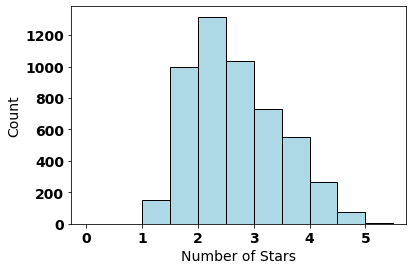

In [19]:
# plot histogram of star ratings
font = {'weight' : 'bold', 'size' : 14}

bins = list(np.arange(0, 5.5, 0.05))

plt.rc('font', **font)
final['stars'].plot.hist(bins=bins, width=0.5, color='lightblue', edgecolor = "black")
plt.xlabel("Number of Stars")
plt.ylabel("Count")

plt.show()
plt.rcdefaults()

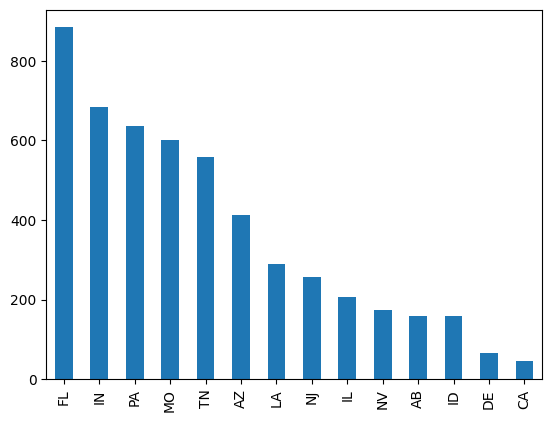

In [20]:
# plot histogram of number of restaurants in each metropolitan area
fast['state'].value_counts().plot(kind='bar')

In [21]:
# produce correlation matrix
correlation = final.corr()
correlation

,BusinessAcceptsCreditCards_True,OutdoorSeating_True,RestaurantsReservations_True,Caters_True,RestaurantsTakeOut_True,Alcohol_'beer_and_wine',Alcohol_'full_bar',GoodForKids_True,RestaurantsPriceRange2_1,RestaurantsPriceRange2_2,...,HasTV_True,HappyHour_True,DriveThru_True,BikeParking_True,BusinessAcceptsBitcoin_True,RestaurantsCounterService_True,garage_True,street_True,lot_True,stars
BusinessAcceptsCreditCards_True,1.000000,0.130434,0.000044,0.084308,0.231092,0.022933,0.005177,0.510751,0.402119,-0.067860,...,0.303903,0.033975,0.122366,0.211273,0.007214,0.011409,0.031134,0.021879,0.133581,0.038447
OutdoorSeating_True,0.130434,1.000000,0.000335,0.130973,0.132381,0.117205,0.007743,0.146527,0.047341,0.037935,...,0.162616,-0.007524,0.057816,0.274681,-0.011789,0.038091,0.058961,0.082300,0.134703,0.180434
RestaurantsReservations_True,0.000044,0.000335,1.000000,0.006766,0.007360,-0.006763,0.045779,-0.015671,-0.017078,0.030740,...,-0.042266,0.070567,-0.013580,0.010334,0.120083,-0.002549,-0.006955,0.036857,-0.034619,0.001978
Caters_True,0.084308,0.130973,0.006766,1.000000,0.158352,0.078494,-0.003863,0.087254,0.068334,-0.012434,...,0.055578,-0.035473,-0.119173,0.132431,0.009344,0.035502,0.073443,0.119472,0.042558,0.301969
RestaurantsTakeOut_True,0.231092,0.132381,0.007360,0.158352,1.000000,0.030189,0.005100,0.194524,0.062279,0.070334,...,0.069883,0.033879,0.152239,0.121748,0.007193,0.011377,0.023889,0.034033,0.057391,0.159640
Alcohol_'beer_and_wine',0.022933,0.117205,-0.006763,0.078494,0.030189,1.000000,-0.004009,0.040055,0.006623,0.018014,...,0.039847,0.017978,-0.082222,0.091242,-0.001635,-0.002586,0.104881,0.052110,0.016728,0.066993
Alcohol_'full_bar',0.005177,0.007743,0.045779,-0.003863,0.005100,-0.004009,1.000000,0.013109,-0.021461,0.050134,...,0.017938,0.126775,-0.018501,0.011992,-0.000955,-0.001511,-0.004123,-0.007260,0.008369,0.012246
GoodForKids_True,0.510751,0.146527,-0.015671,0.087254,0.194524,0.040055,0.013109,1.000000,0.316911,0.029529,...,0.379790,0.039559,0.102578,0.256482,0.009544,0.015095,0.035316,0.052204,0.104492,0.079063
RestaurantsPriceRange2_1,0.402119,0.047341,-0.017078,0.068334,0.062279,0.006623,-0.021461,0.316911,1.000000,-0.593609,...,0.214516,-0.054687,0.124595,0.111312,0.006968,-0.008871,0.008068,0.023350,0.042841,-0.099264
RestaurantsPriceRange2_2,-0.067860,0.037935,0.030740,-0.012434,0.070334,0.018014,0.050134,0.029529,-0.593609,1.000000,...,-0.040904,0.117352,-0.107302,0.067914,-0.004136,0.024563,0.016559,-0.011594,0.059866,0.139963


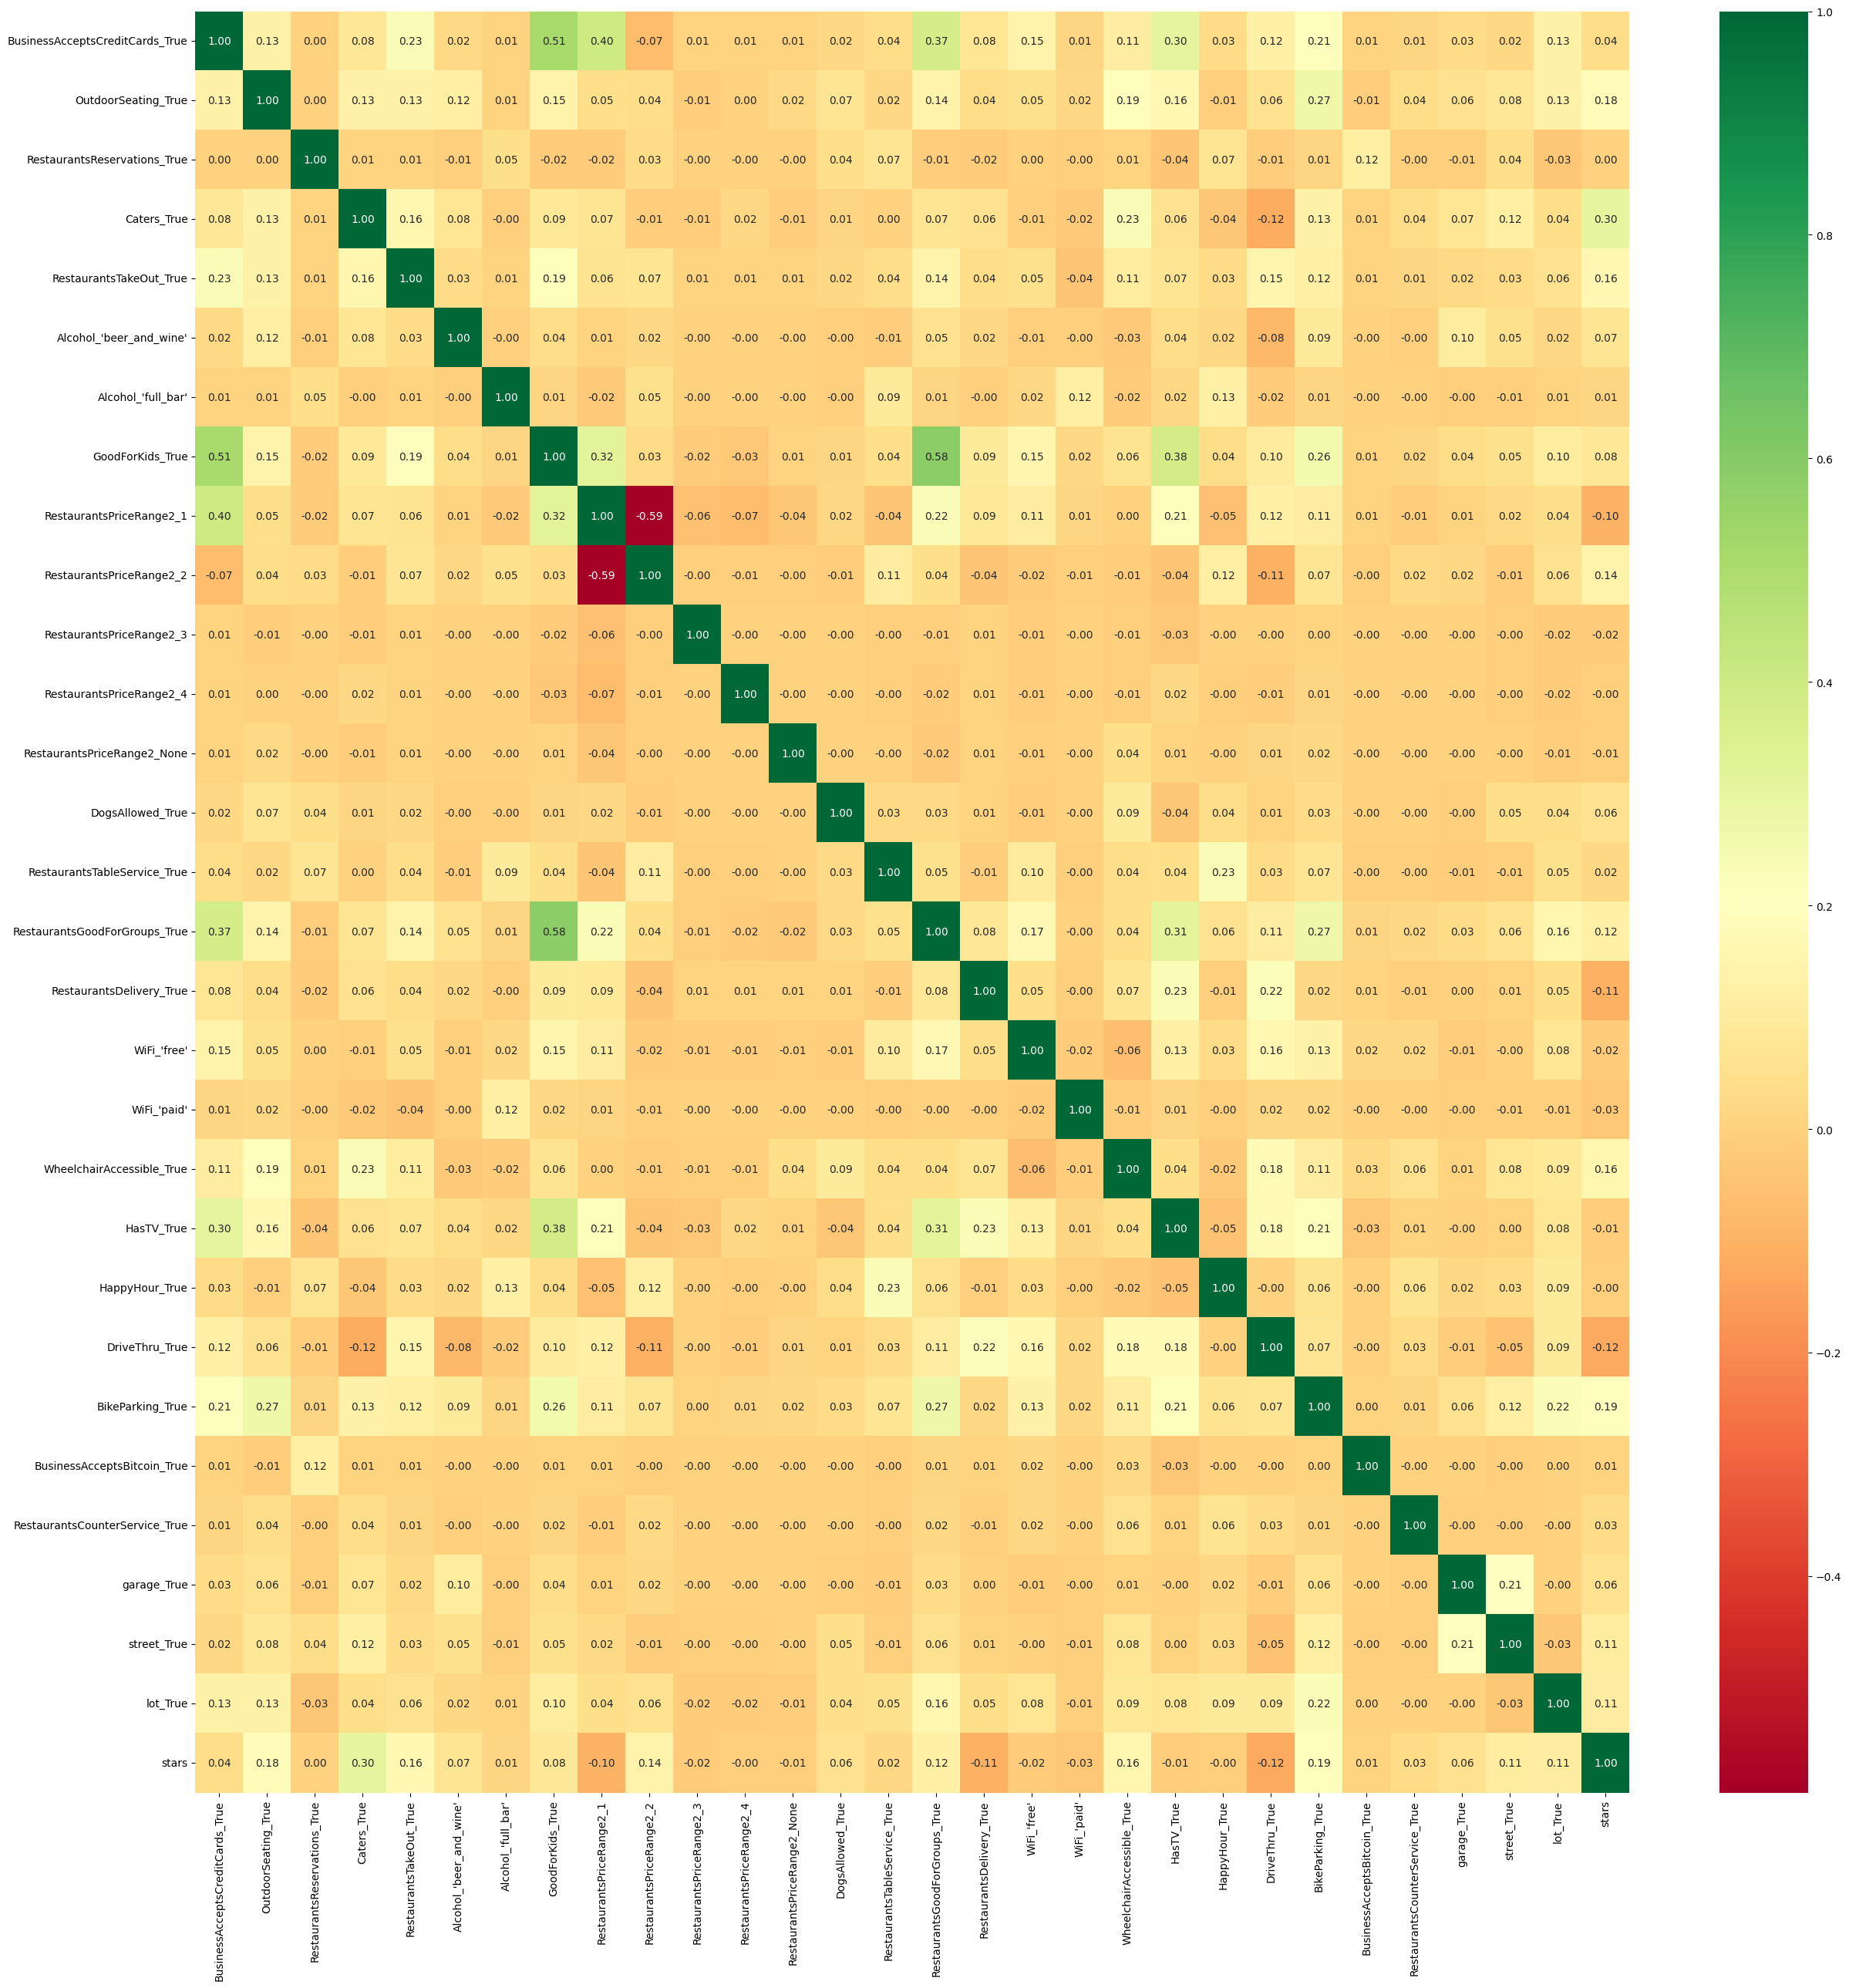

In [22]:
# plot correlation matrix of all 30 features and target
import seaborn as sns
top_corr_features = correlation.index
plt.figure(figsize=(30,30))
g = sns.heatmap(final[top_corr_features].corr(), annot=True, cmap="RdYlGn", fmt='.2f')

In [23]:
# list the highest correlations between variables
sorted_mat = correlation.unstack().abs()
sorted_mat = pd.DataFrame(sorted_mat).reset_index()
sorted_mat.columns = ['v1', 'v2', 'correlation']
sorted_mat = sorted_mat.sort_values(by=['correlation'], ascending=False)
sorted_mat = sorted_mat[sorted_mat.correlation != 1.0] # delete corr(x, x)
sorted_mat = sorted_mat.drop(index=sorted_mat.index[::2]) # delete repeated correlations
sorted_mat

,v1,v2,correlation
249,RestaurantsPriceRange2_1,RestaurantsPriceRange2_2,0.593609
225,GoodForKids_True,RestaurantsGoodForGroups_True,0.582985
7,BusinessAcceptsCreditCards_True,GoodForKids_True,0.510751
240,RestaurantsPriceRange2_1,BusinessAcceptsCreditCards_True,0.402119
230,GoodForKids_True,HasTV_True,0.379790
...,...,...,...
652,HappyHour_True,DriveThru_True,0.000283
370,RestaurantsPriceRange2_None,RestaurantsPriceRange2_3,0.000275
732,BusinessAcceptsBitcoin_True,RestaurantsPriceRange2_None,0.000275
827,street_True,WiFi_'free',0.000046


## Running multivariate linear regressions

In [24]:
# create X (all the features) and y (target)
X = final.iloc[:,:-2]
y = final['stars']

# split the data into train (85%) and test (15%) sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
print("Number of restaurants in overall training set:", X_train.shape[0])
print("Number of restaurants in testing set:", X_test.shape[0])
print()

# split training set into true training (70%) and validation (15%) sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=0)
print("Number of restaurants in training set:", X_train.shape[0])
print("Number of restaurants in validation set:", X_val.shape[0])

Number of restaurants in overall training set: 4364
Number of restaurants in testing set: 771

Number of restaurants in training set: 3709
Number of restaurants in validation set: 655


#### Performing normal linear regression

In [25]:
# trains linear regression on training data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lm = LinearRegression()
lm.fit(X=X_train, y=y_train)

# tests linear regression on validation set
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_val)

print("Training set:")
print("MSE of linear regression:", mean_squared_error(y_train, y_pred_train))
r2 = r2_score(y_train, y_pred_train)
adj_r2 = 1-((1-r2)*(len(X_train)-1)/(len(X_train)-(len(final.columns) - 2)-1))
print('Adjusted R^2 of linear regression:', adj_r2)

print("Validation set:")
print("MSE of linear regression:", mean_squared_error(y_val, y_pred_test))
r2 = r2_score(y_val, y_pred_test)
adj_r2 = 1-((1-r2)*(len(X_val)-1)/(len(X_val)-(len(final.columns) - 2)-1))
print('Adjusted R^2 of linear regression:', adj_r2)

Training set:
MSE of linear regression: 0.526097785453373
Adjusted R^2 of linear regression: 0.19357339739773827
Validation set:
MSE of linear regression: 0.47447099007093757
Adjusted R^2 of linear regression: 0.16182129654293587


#### Performing Lasso, Ridge, & ElasticNet regressions


Text(0.5, 1.0, 'MSE for Every Alpha Value')

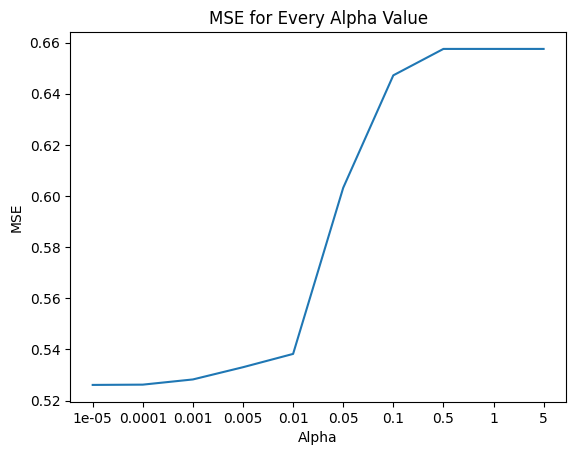

In [26]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# performing Lasso regression
mse_arr = []
x = [0.00001, 0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5]

# trains Lasso for different alphas on training data
for i in x:
  lasso = Lasso(alpha = i)
  lasso.fit(X=X_train, y=y_train)
  pred = lasso.predict(X_train)
  mse = mean_squared_error(pred, y_train)
  mse_arr.append(mse)

# plot MSE for different alpha values
default_x_ticks = range(len(x))
plt.xticks(default_x_ticks, x)
plt.plot(mse_arr)
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE for Every Alpha Value')

In [27]:
# performs Lasso regression on validation data
lasso = Lasso(alpha = 0.0001)
lasso.fit(X=X_train, y=y_train)
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_val)

print("Training set:")
print("MSE of Lasso regression:", mean_squared_error(y_train, y_pred_train))
r2 = r2_score(y_train, y_pred_train)
adj_r2 = 1-((1-r2)*(len(X_train)-1)/(len(X_train)-(len(final.columns) - 2)-1))
print('Adjusted R^2 of Lasso regression:', adj_r2)

print("Validation set:")
print("MSE of Lasso regression:", mean_squared_error(y_val, y_pred_test))
r2 = r2_score(y_val, y_pred_test)
adj_r2 = 1-((1-r2)*(len(X_val)-1)/(len(X_val)-(len(final.columns) - 2)-1))
print('Adjusted R^2 of Lasso regression:', adj_r2)

Training set:
MSE of Lasso regression: 0.526209016998723
Adjusted R^2 of Lasso regression: 0.19340289662830146
Validation set:
MSE of Lasso regression: 0.4744861481030828
Adjusted R^2 of Lasso regression: 0.1617945190581237


Text(0.5, 1.0, 'MSE for Every Alpha Value')

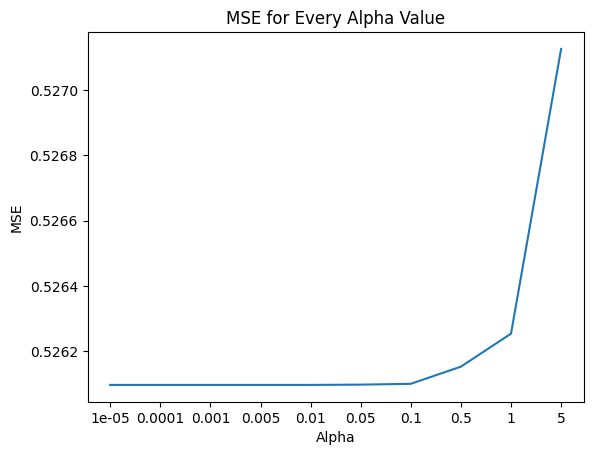

In [28]:
# performing Ridge regression
mse_arr = []

# trains Ridge for different alphas on training data
for i in x:
  ridge = Ridge(alpha = i)
  ridge.fit(X=X_train, y=y_train)
  pred = ridge.predict(X_train)
  mse = mean_squared_error(pred, y_train)
  mse_arr.append(mse)

# plot MSE for different alpha values
default_x_ticks = range(len(x))
plt.xticks(default_x_ticks, x)
plt.plot(mse_arr)
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE for Every Alpha Value')

In [29]:
# performs Ridge regression on validation data
ridge = Ridge(alpha = 0.1)
ridge.fit(X=X_train, y=y_train)
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_val)

print("Training set:")
print("MSE of Ridge regression:", mean_squared_error(y_train, y_pred_train))
r2 = r2_score(y_train, y_pred_train)
adj_r2 = 1-((1-r2)*(len(X_train)-1)/(len(X_train)-(len(final.columns) - 2)-1))
print('Adjusted R^2 of Ridge regression:', adj_r2)

print("Validation set:")
print("MSE of Ridge regression:", mean_squared_error(y_val, y_pred_test))
r2 = r2_score(y_val, y_pred_test)
adj_r2 = 1-((1-r2)*(len(X_val)-1)/(len(X_val)-(len(final.columns) - 2)-1))
print('Adjusted R^2 of Ridge regression:', adj_r2)

Training set:
MSE of Ridge regression: 0.526101165034612
Adjusted R^2 of Ridge regression: 0.19356821702197524
Validation set:
MSE of Ridge regression: 0.47422809822744666
Adjusted R^2 of Ridge regression: 0.1622503781405843


Text(0.5, 1.0, 'MSE for Every Alpha Value')

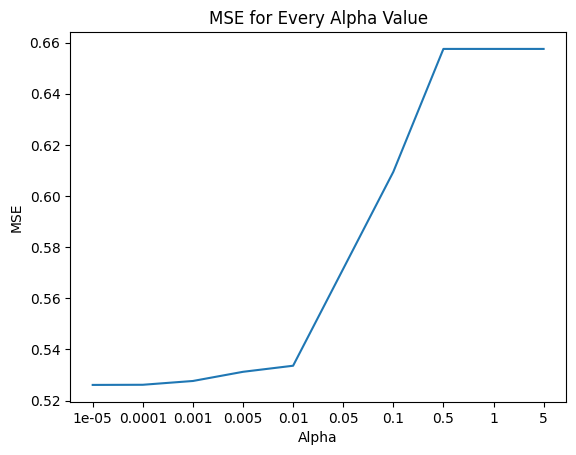

In [30]:
# performing ElasticNet regression
mse_arr = []

# trains ElasticNet for different alphas on training data
for i in x:
  en = ElasticNet(alpha = i)
  en.fit(X=X_train, y=y_train)
  pred = en.predict(X_train)
  mse = mean_squared_error(pred, y_train)
  mse_arr.append(mse)

# plot MSE for different alpha values
default_x_ticks = range(len(x))
plt.xticks(default_x_ticks, x)
plt.plot(mse_arr)
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE for Every Alpha Value')

In [31]:
# performs ElasticNet regression on validation data
en = ElasticNet(alpha = 0.0001)
en.fit(X=X_train, y=y_train)
y_pred_train = en.predict(X_train)
y_pred_test = en.predict(X_val)

print("Training set:")
print("MSE of ElasticNet regression:", mean_squared_error(y_train, y_pred_train))
r2 = r2_score(y_train, y_pred_train)
adj_r2 = 1-((1-r2)*(len(X_train)-1)/(len(X_train)-(len(final.columns) - 2)-1))
print('Adjusted R^2 of ElasticNet regression:', adj_r2)

print("Validation set:")
print("MSE of ElasticNet regression:", mean_squared_error(y_val, y_pred_test))
r2 = r2_score(y_val, y_pred_test)
adj_r2 = 1-((1-r2)*(len(X_val)-1)/(len(X_val)-(len(final.columns) - 2)-1))
print('Adjusted R^2 of ElasticNet regression:', adj_r2)

Training set:
MSE of ElasticNet regression: 0.5261571989334048
Adjusted R^2 of ElasticNet regression: 0.19348232571453483
Validation set:
MSE of ElasticNet regression: 0.47405084622089544
Adjusted R^2 of ElasticNet regression: 0.16256350341092818


#### Performing PCA regression

There are multiple independent variables that have fairly large correlations. Therefore, we should think about using PCA.

[0.6578664589519571,
 0.6451477132964375,
 0.602629100384227,
 0.5613015147434669,
 0.5615562638340502,
 0.561571582327087,
 0.5596797774695526,
 0.5425894096046178,
 0.5422463945404696,
 0.5426332381469356,
 0.5428770363194219,
 0.5430455588520835,
 0.5443173112303757,
 0.56918177522086,
 0.6164100146347723,
 0.5829121311635266,
 0.5492656152128194,
 0.6734132700675087,
 0.6838728028578119,
 0.6536276704032216,
 0.6992235434746611,
 0.8840859176867437,
 0.9917040574030241,
 1.5794902181422013,
 4.011396791623612,
 2.827736325196475,
 6.826883877028848,
 3.584883758129441e+26,
 6.630185610385332e+26]

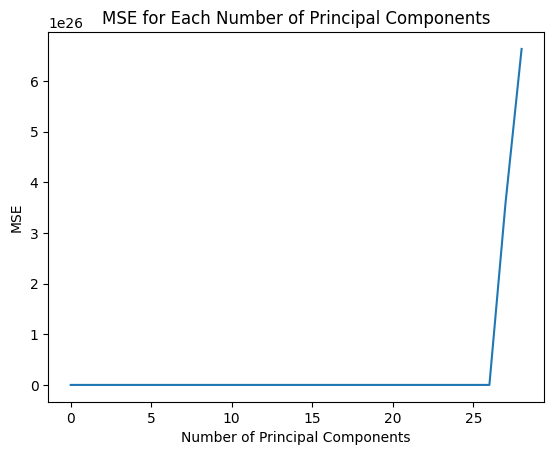

In [32]:
# performing PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# scale predictor variables
pca = PCA()
X_reduced = pca.fit_transform(scale(X_train))

# define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=0)

regr = LinearRegression()
mse = []

# calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_reduced),1)), y_train, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, len(final.columns) - 2):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y_train, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# plot and print cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('MSE for Each Number of Principal Components')
mse

Want at most first 27 features.

array([ 11.31,  17.61,  23.14,  27.89,  32.31,  36.47,  40.47,  44.33,
        48.17,  51.84,  55.48,  59.04,  62.59,  66.01,  69.35,  72.52,
        75.63,  78.57,  81.39,  84.13,  86.75,  89.25,  91.58,  93.72,
        95.83,  97.62,  98.97, 100.  , 100.  ])

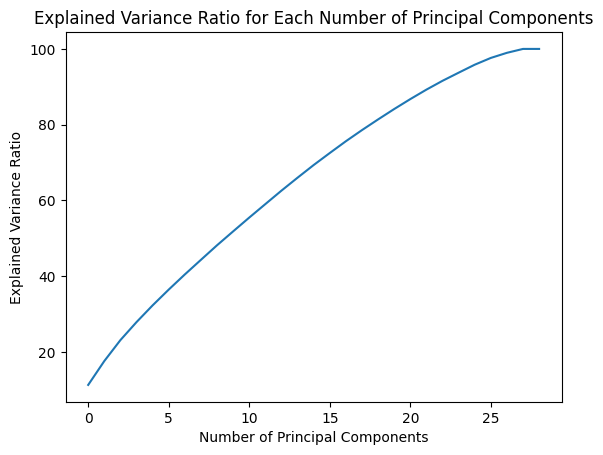

In [33]:
# list percentage of how much regression explains dependent variable when adding each component
explained = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(explained)
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Number of Principal Components')
explained

Explained variance of the PCA regression on the training set begins to flatten around 27 features.

In [34]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# scale the training and validation data
X_pca_train = sc.fit_transform(X_train)
X_pca_val = sc.transform(X_val)
# X_reduced_train = pca.fit_transform(scale(X_train))
# X_reduced_test = pca.transform(scale(X_val))[:,:1]

pca = PCA(n_components=27)

X_pca_train = pca.fit_transform(X_pca_train)
X_pca_val = pca.transform(X_pca_val)

# train PCR model on training data
regr = LinearRegression()
regr.fit(X_pca_train, y_train)

# fit model on validation data and calculate RMSE
pred_train = regr.predict(X_pca_train)
pred_val = regr.predict(X_pca_val)

print("Training set:")
print('MSE of PCA:', mean_squared_error(y_train, pred_train))

r2 = r2_score(y_train, pred_train)
adj_r2 = 1-((1-r2)*(len(X_pca_train)-1)/(len(X_pca_train)-(len(final.columns) - 2)-1))
print('Adjusted R^2 of PCA:', adj_r2)

print("Validation set:")
print('MSE of PCA:', mean_squared_error(y_val, pred_val))

r2 = r2_score(y_val, pred_val)
adj_r2 = 1-((1-r2)*(len(X_pca_val)-1)/(len(X_pca_val)-(len(final.columns) - 2)-1))
print('Adjusted R^2 of PCA:', adj_r2)

Training set:
MSE of PCA: 0.5267829314780206
Adjusted R^2 of PCA: 0.1925231744235686
Validation set:
MSE of PCA: 0.47566609115591824
Adjusted R^2 of PCA: 0.1597100857442325


#### Performing Recursive Feature Elimination regression

In [35]:
# alter final dataset's features
from sklearn.feature_selection import RFE

mse_arr = []

for i in range(1, len(final.columns) - 1):
  # get most important variables
  selector = RFE(lm, n_features_to_select=i)

  selector = selector.fit(X_train, y_train)

  # getting the indices where selector returns True
  newlist = pd.Series([*selector.support_])
  true_indices = [i for i, x in enumerate(newlist) if x]

  # filter the dataframe 
  train_df = X_train.iloc[:, true_indices]
  print('number of features selected:', train_df.shape[1])

  # fit linear regression
  lm = LinearRegression()
  train = lm.fit(train_df, y_train)
  pred = lm.predict(train_df)
  mse = mean_squared_error(pred, y_train)
  mse_arr.append(mse)
  print(f'mean squared error for var importance {i}: {mse}')
  
  r2 = r2_score(y_train, pred)
  adj_r2 = 1-((1-r2)*(len(X_train)-1)/(len(X_train)-(len(final.columns) - 2)-1))
  print('Adjusted R^2 of var importance:', adj_r2)

number of features selected: 1
mean squared error for var importance 1: 0.6537008040974409
Adjusted R^2 of var importance: -0.002022310571742958
number of features selected: 2
mean squared error for var importance 2: 0.6521196614516916
Adjusted R^2 of var importance: 0.0004013367563716619
number of features selected: 3
mean squared error for var importance 3: 0.6518946054951639
Adjusted R^2 of var importance: 0.0007463127578611894
number of features selected: 4
mean squared error for var importance 4: 0.5942705171038174
Adjusted R^2 of var importance: 0.08907513510680909
number of features selected: 5
mean squared error for var importance 5: 0.5938485822317453
Adjusted R^2 of var importance: 0.08972189606040504
number of features selected: 6
mean squared error for var importance 6: 0.5901839775163554
Adjusted R^2 of var importance: 0.09533916876564053
number of features selected: 7
mean squared error for var importance 7: 0.5901662260780413
Adjusted R^2 of var importance: 0.09536637897

Text(0.5, 1.0, 'MSE for Every Number of Features Selected')

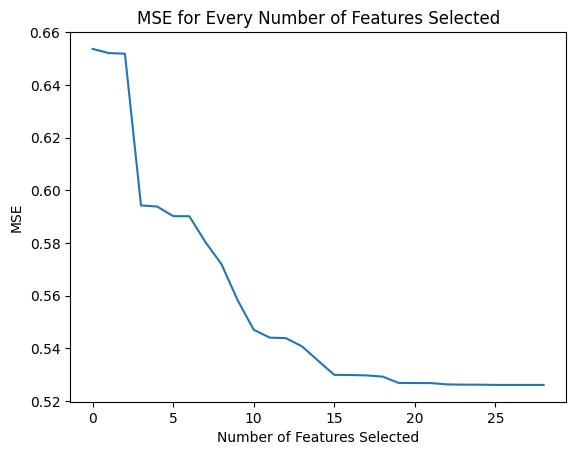

In [36]:
# plot MSE for number of features selected using RFE
plt.plot(mse_arr)
plt.xlabel('Number of Features Selected')
plt.ylabel('MSE')
plt.title('MSE for Every Number of Features Selected')

In [37]:
# perform RFE on validation set
selector = RFE(lm, n_features_to_select=19)
selector = selector.fit(X_train, y_train)

# getting the indices where selector returns True
newlist = pd.Series([*selector.support_])
true_indices = [i for i, x in enumerate(newlist) if x]

# filter the dataframe
train_df = X_train.iloc[:, true_indices]
val_df = X_val.iloc[:, true_indices]

# fit linear regression
lm = LinearRegression()
train = lm.fit(train_df, y_train)
pred = lm.predict(val_df)
mse = mean_squared_error(pred, y_val)
mse_arr.append(mse)
r2 = r2_score(y_val, pred)
adj_r2 = 1-((1-r2)*(len(X_val)-1)/(len(X_val)-(len(final.columns) - 2)-1))
print("Validation set:")
print(f'Mean squared error for RFE: {mse}')
print(f'Adjusted R^2 for RFE: {adj_r2}')

Validation set:
Mean squared error for RFE: 0.4826202685780895
Adjusted R^2 for RFE: 0.14742515465823613


### Determining most important features using ElasticNet regression

In [38]:
# performs ElasticNet regression on testing data
en = ElasticNet(alpha = 0.0001)
en.fit(X=X_train, y=y_train)
y_pred_test = en.predict(X_test)

print("Testing set:")
print("MSE of ElasticNet regression:", mean_squared_error(y_test, y_pred_test))
r2 = r2_score(y_test, y_pred_test)
adj_r2 = 1-((1-r2)*(len(X_test)-1)/(len(X_test)-(len(final.columns) - 2)-1))
print('Adjusted R^2 of ElasticNet regression:', adj_r2)

Testing set:
MSE of ElasticNet regression: 0.5150609893786287
Adjusted R^2 of ElasticNet regression: 0.15343664559591685


In [39]:
# prints all the ElasticNet features' coefficients
coef_values = pd.DataFrame(en.coef_, columns=['coefficient'])
coef_names = pd.DataFrame(X.columns, columns=['name'])
coef = pd.concat([coef_names, coef_values], axis=1, ignore_index=True)
coef.rename(columns = {0:'feature', 1:'coefficient'}, inplace = True)
coef

,feature,coefficient
0,BusinessAcceptsCreditCards_True,-0.035031
1,OutdoorSeating_True,0.166425
2,RestaurantsReservations_True,-0.066157
3,Caters_True,0.409243
4,RestaurantsTakeOut_True,0.201919
5,Alcohol_'beer_and_wine',0.053686
6,Alcohol_'full_bar',0.169115
7,GoodForKids_True,0.000626
8,RestaurantsPriceRange2_1,-0.283204
9,RestaurantsPriceRange2_2,0.141789


In [40]:
# prints top 10 positive coefficients
coef.nlargest(n=10, columns='coefficient')

,feature,coefficient
13,DogsAllowed_True,1.309362
25,RestaurantsCounterService_True,0.473756
3,Caters_True,0.409243
19,WheelchairAccessible_True,0.226542
27,street_True,0.225747
4,RestaurantsTakeOut_True,0.201919
15,RestaurantsGoodForGroups_True,0.195857
26,garage_True,0.170068
6,Alcohol_'full_bar',0.169115
1,OutdoorSeating_True,0.166425


In [41]:
# prints top 10 negative coefficients
coef.nsmallest(n=10, columns='coefficient')

,feature,coefficient
11,RestaurantsPriceRange2_4,-0.509780
18,WiFi_'paid',-0.406131
10,RestaurantsPriceRange2_3,-0.287332
8,RestaurantsPriceRange2_1,-0.283204
16,RestaurantsDelivery_True,-0.247503
21,HappyHour_True,-0.214551
22,DriveThru_True,-0.159563
2,RestaurantsReservations_True,-0.066157
20,HasTV_True,-0.048810
0,BusinessAcceptsCreditCards_True,-0.035031


The above are the top 20 most important features that have positive and negative effects for determining a stars restaurant's star rating.

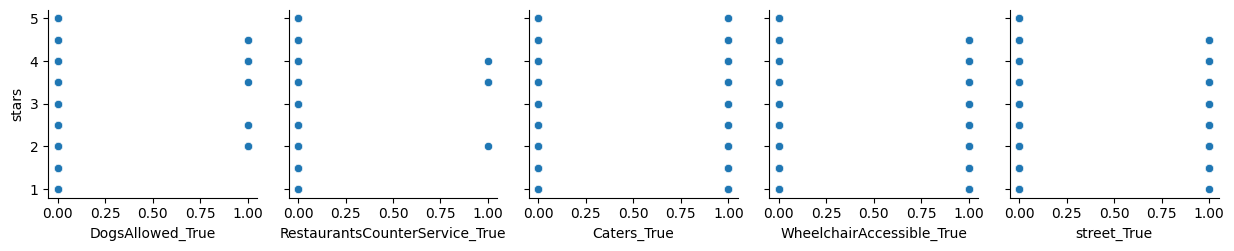

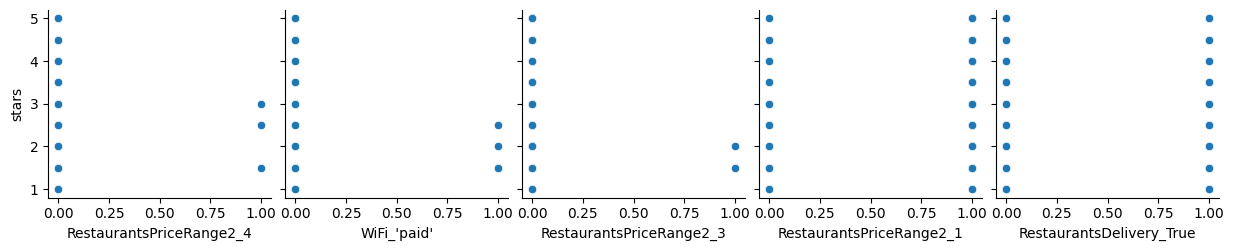

In [42]:
import seaborn as sns

# plotting ratings against important features with positive effects
sns.pairplot(final, x_vars=['DogsAllowed_True', 'RestaurantsCounterService_True',
                            'Caters_True', 'WheelchairAccessible_True', 'street_True'],
                            y_vars='stars')

# plotting ratings against important features with negative effects
sns.pairplot(final, x_vars=['RestaurantsPriceRange2_4', "WiFi_'paid'",
                            'RestaurantsPriceRange2_3', 'RestaurantsPriceRange2_1',
                            'RestaurantsDelivery_True'], y_vars='stars')